# Data Science Research Project P2 (WQD7002)
## Title: Stock market prediction using machine learning models

#### Matrix Number : 17051386/1

#### Name                 : Chey Poh Lian

In [38]:
#Install the dependencies
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [39]:
# Get the stock data
df = pd.read_csv('AAPL.csv')
# Take a look at the data
print(df.head())

       Date   Open   High    Low  Close     Volume
0  2/1/2020  74.06  75.15  73.80  75.09  135480400
1  3/1/2020  74.29  75.14  74.13  74.36  146322800
2  6/1/2020  73.45  74.99  73.19  74.95  118387200
3  7/1/2020  74.96  75.22  74.37  74.60  108872000
4  8/1/2020  74.29  76.11  74.29  75.80  132079200


In [40]:
print(df.describe())

            Open        High         Low       Close        Volume
count  252.00000  252.000000  252.000000  252.000000  2.520000e+02
mean    95.11377   96.510754   93.762857   95.198849  1.577966e+08
std     21.91846   22.007283   21.490150   21.725303  6.987198e+07
min     57.02000   57.130000   53.150000   56.090000  4.669130e+07
25%     76.97500   78.112500   76.182500   77.387500  1.113394e+08
50%     91.26500   92.795000   90.740000   91.420000  1.381294e+08
75%    115.80750  117.265000  114.130000  115.720000  1.875871e+08
max    138.05000  138.790000  134.340000  136.690000  4.265100e+08


In [41]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,252.0,9.511377e+01,2.191846e+01,57.02,7.697500e+01,9.126500e+01,1.158075e+02,1.380500e+02
High,252.0,9.651075e+01,2.200728e+01,57.13,7.811250e+01,9.279500e+01,1.172650e+02,1.387900e+02
Low,252.0,9.376286e+01,2.149015e+01,53.15,7.618250e+01,9.074000e+01,1.141300e+02,1.343400e+02
Close,252.0,9.519885e+01,2.172530e+01,56.09,7.738750e+01,9.142000e+01,1.157200e+02,1.366900e+02
Volume,252.0,1.577966e+08,6.987198e+07,46691300.00,1.113394e+08,1.381294e+08,1.875871e+08,4.265100e+08


In [42]:
df.describe(include=['object']).transpose()

,count,unique,top,freq
Date,252,252,22/1/2020,1


In [43]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [44]:
# Get the Date and Close Price 
df = df[['Date','Close']] 
# Take a look at the new data 
print(df.head())

       Date  Close
0  2/1/2020  75.09
1  3/1/2020  74.36
2  6/1/2020  74.95
3  7/1/2020  74.60
4  8/1/2020  75.80


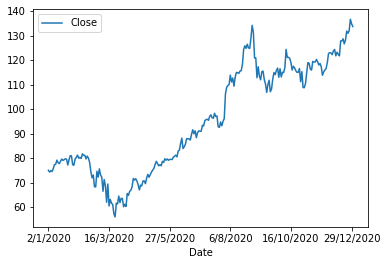

In [45]:
df.plot(x="Date", y=["Close"])
plt.show()

In [46]:
# Get the Close Price 
df = df[['Close']] 
# Take a look at the new data 
print(df.head())

   Close
0  75.09
1  74.36
2  74.95
3  74.60
4  75.80


In [47]:
print(df.describe())

            Close
count  252.000000
mean    95.198849
std     21.725303
min     56.090000
25%     77.387500
50%     91.420000
75%    115.720000
max    136.690000


In [48]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Close,252.0,95.198849,21.725303,56.09,77.3875,91.42,115.72,136.69


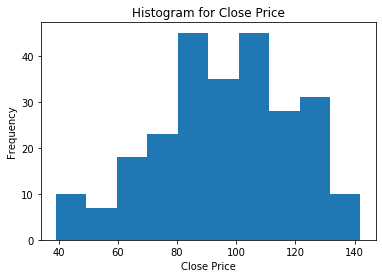

In [49]:
df = np.random.normal(95, 22, 252)
plt.hist(df)
plt.title("Histogram for Close Price")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

In [50]:
# Get the Close Price 
df = df[['Close']] 
# Take a look at the new data 
print(df.head())

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [51]:
# A variable for predicting 'n' days out into the future
forecast_out = 30 #'n=30' days
#Create another column (the target ) shifted 'n' units up
df['Prediction'] = df[['Close']].shift(-forecast_out)
#print the new data set
print(df.tail())

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [52]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))

#Remove the last '30' rows
X = X[:-forecast_out]
print(X)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [53]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array 
y = np.array(df['Prediction'])
# Get all of the y values except the last '30' rows
y = y[:-forecast_out]
print(y)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [510]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [511]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [512]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.6567757731799955


In [513]:
#Create the decision trees regressor model
tree = DecisionTreeRegressor()
# Train the model
tree.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [514]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
tree_confidence = tree.score(x_test, y_test)
print("tree confidence: ", tree_confidence)

tree confidence:  0.5407935859115963


In [515]:
# Create and train the Support Vector Machines (Regressor) 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [516]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.7545103218144947


In [517]:
# Set x_forecast equal to the last 30 rows of the original data set from Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[119.39]
 [118.03]
 [118.64]
 [117.34]
 [113.85]
 [115.17]
 [116.03]
 [116.59]
 [119.05]
 [122.72]
 [123.08]
 [122.94]
 [122.25]
 [123.75]
 [124.38]
 [121.78]
 [123.24]
 [122.41]
 [121.78]
 [127.88]
 [127.81]
 [128.7 ]
 [126.66]
 [128.23]
 [131.88]
 [130.96]
 [131.97]
 [136.69]
 [134.87]
 [133.72]]


In [518]:
# Print linear regression model predictions for the next '30' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[123.86466864 122.60984909 123.17267257 121.9732127  118.75312428
 119.97103738 120.76452622 121.28121662 123.55096375 126.93713123
 127.26928934 127.14011674 126.50348035 127.88747251 128.46874921
 126.06982948 127.41691517 126.65110618 126.06982948 131.69806424
 131.63347794 132.45464662 130.57241729 132.02099574 135.38870999
 134.53986146 135.47174951 139.8267115  138.14746768 137.08640703]


In [519]:
# Print decision trees model predictions for the next '30' days
tree_prediction = tree.predict(x_forecast)
print(tree_prediction)

[131.97 113.02 128.23 116.87 106.84 118.03 122.72 121.78 126.66 116.03
 113.85 113.85 116.03 113.85 113.85 116.03 113.85 116.03 116.03 114.97
 114.97 114.97 114.97 114.97 120.71 120.71 120.71 120.71 120.71 120.71]


In [520]:
# Print support vector regressor model predictions for the next '30' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[129.37565731 118.81145536 123.18683617 118.07029888 114.35020542
 117.47220211 120.63447386 120.19883599 126.9324473  100.08587783
 102.34676144 101.28096981 100.13323732 108.93248214 113.84952338
 104.18191614 103.77805673  99.67484699 104.18191614 126.31842154
 125.59854105 132.99518504 115.50710926 129.67298038 116.76996996
 124.42546737 116.10680704 102.71390977 104.44372451 107.18100539]
